In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import kagglehub

d:\Data Science\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")
print("Path to dataset files:", path)

all_files=os.listdir(path)
display(all_files)
path=path+'/'+all_files[0]
path

Path to dataset files: C:\Users\Maddox\.cache\kagglehub\datasets\iammustafatz\diabetes-prediction-dataset\versions\1


['diabetes_prediction_dataset.csv']

'C:\\Users\\Maddox\\.cache\\kagglehub\\datasets\\iammustafatz\\diabetes-prediction-dataset\\versions\\1/diabetes_prediction_dataset.csv'

In [3]:
data=pd.read_csv(path)
data.sample(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
96637,Male,28.0,0,0,No Info,27.32,4.5,130,0
52321,Male,19.0,0,0,No Info,30.93,4.8,85,0


In [4]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
data.shape

(100000, 9)

In [8]:
#checking and droping duplicated rows
duplicated_rows=data[data.duplicated()]
print(f'no. of duplicated rows is {duplicated_rows.shape}')
data=data.drop_duplicates()
print(f'No of rows after droping duplicated rows is {data.shape}')

no. of duplicated rows is (3854, 9)


No of rows after droping duplicated rows is (96146, 9)


<Axes: >

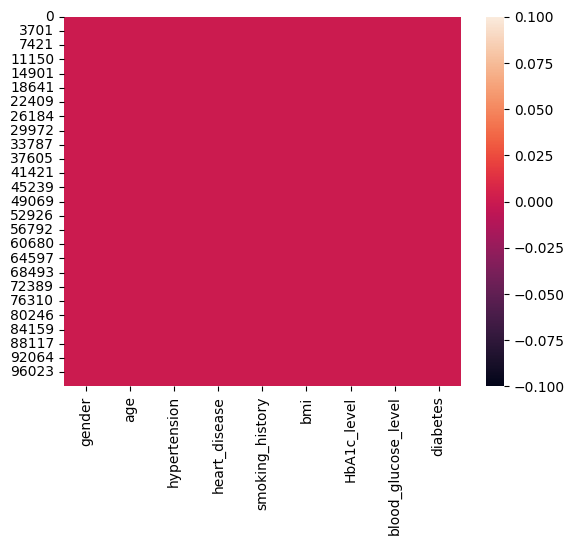

In [9]:
sns.heatmap(data.isnull())

In [10]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

All data is non null however 2 of the rows are object not a number, need to encode them

In [11]:
cols=list(data.columns)
cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [12]:
object_columns=[]
for col in cols:
    if data[col].dtype=='object':
        print(f"Unique values in {col}: {data[col].unique()}")
        object_columns.append(col)
print("Object columns:", object_columns)

Unique values in gender: ['Female' 'Male' 'Other']
Unique values in smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']
Object columns: ['gender', 'smoking_history']


In [13]:
#Checking the value count of 'gender' and if 'other' is less then droping those rows
print(f'Before Droping\n{data['gender'].value_counts()}')

#it's only 18 so we'll remove the 'other' rows
data=data[data['gender']!='Other']
print(f'\n\nAfter Droping\n{data['gender'].value_counts()}')

Before Droping
gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64


After Droping
gender
Female    56161
Male      39967
Name: count, dtype: int64


### **Performing EDA Here**

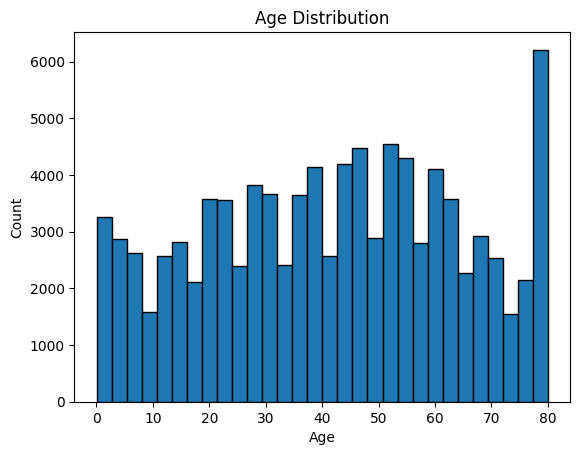

In [14]:
# Histogram for age
plt.hist(data['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\Maddox\AppData\Local\Temp\ipykernel_18692\606708405.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=data, palette='mako')


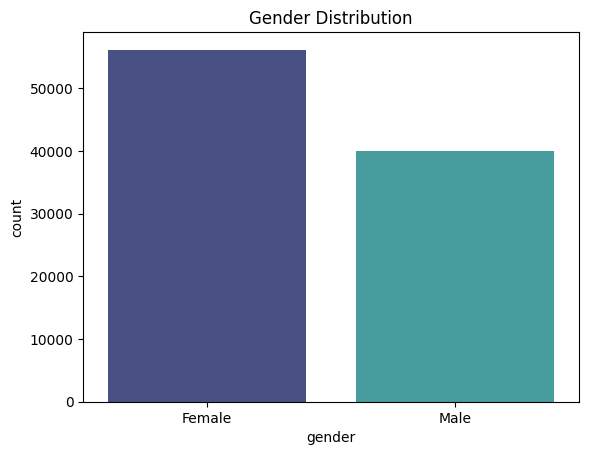

In [15]:
#checking the gender distribution of the dataset
sns.countplot(x='gender', data=data, palette='mako')
plt.title('Gender Distribution')
plt.show()

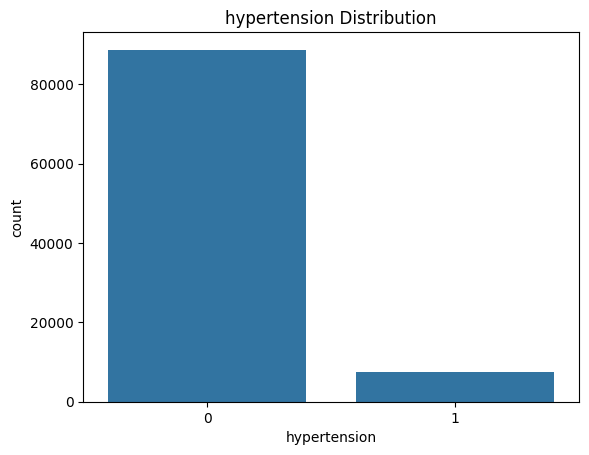

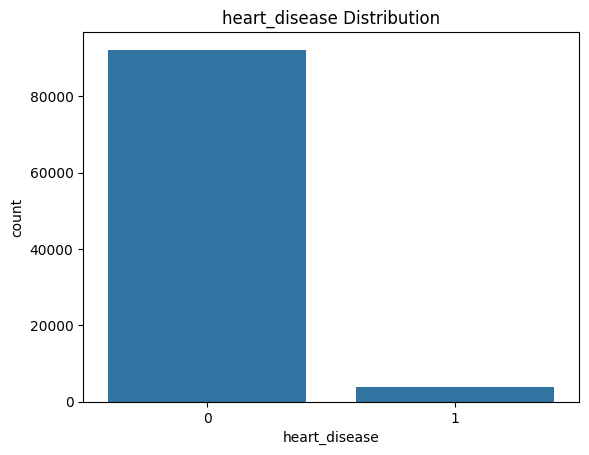

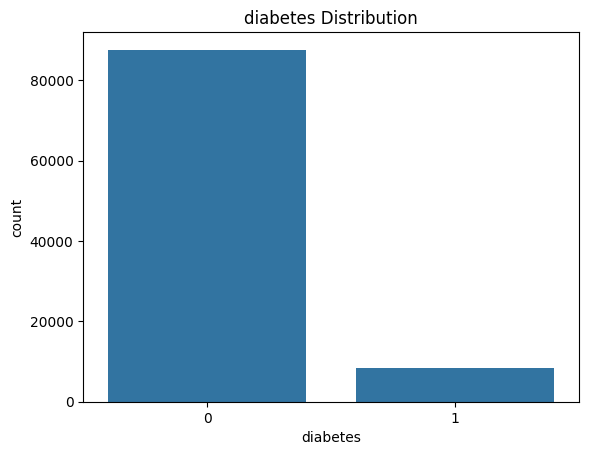

In [16]:
# Count plots for binary variables
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(data=data, x=col)
    plt.title(f'{col} Distribution')
    plt.show()

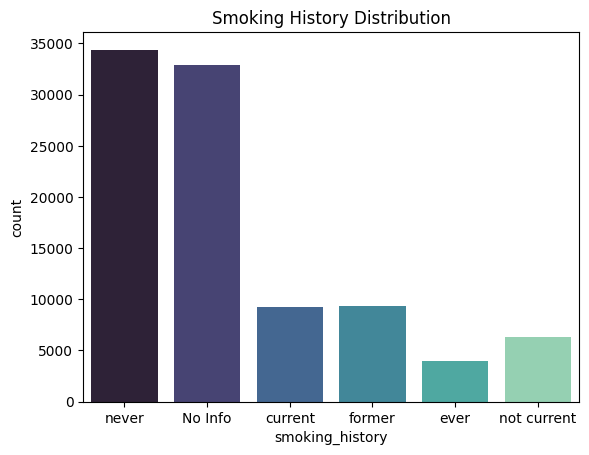

In [17]:
# Count plot for smoking history
warnings.filterwarnings('ignore')
sns.countplot(x='smoking_history', data=data, palette='mako')
plt.title('Smoking History Distribution')
plt.show()

Bivariant Analysis from here (Visualisation)

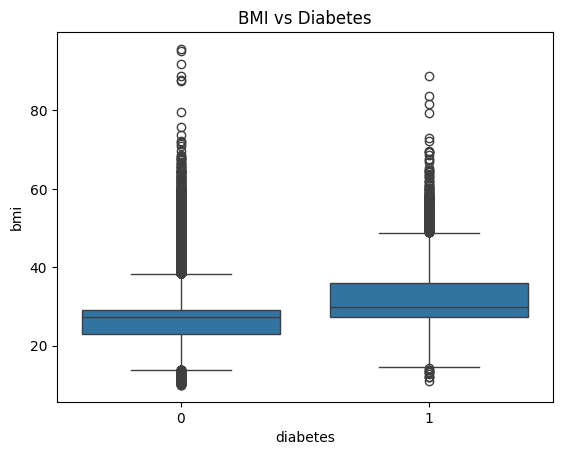

In [18]:
#boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=data)
plt.title('BMI vs Diabetes')
plt.show()

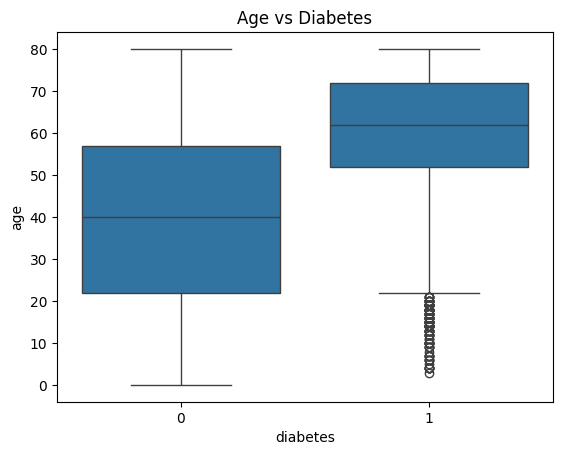

In [19]:
#boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=data)
plt.title('Age vs Diabetes')
plt.show()

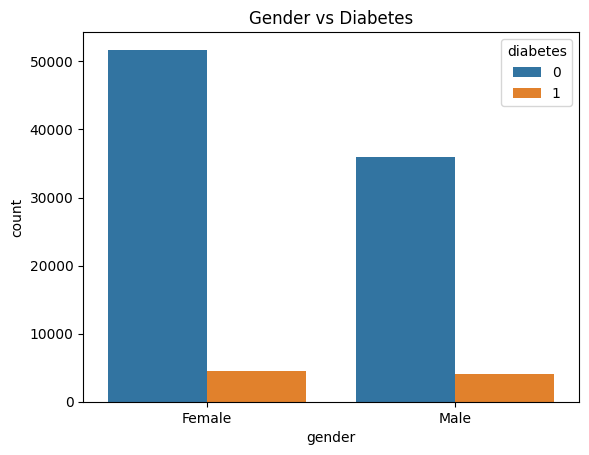

In [20]:
#count plot of gender vs diabetes
sns.countplot( data=data, x='gender', hue='diabetes')
plt.title('Gender vs Diabetes')
plt.show()

Scatterplot here

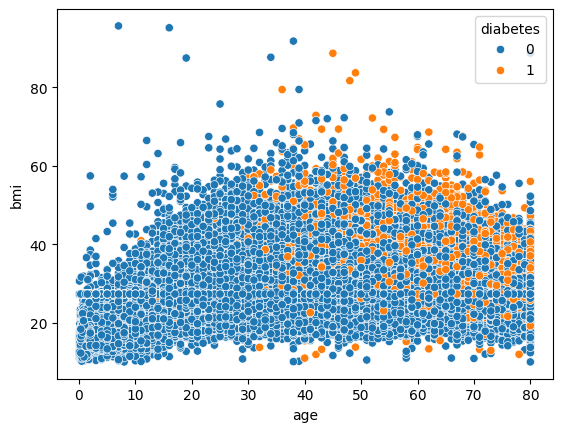

In [ ]:
sns.scatterplot(x='age', y='bmi', data=data, hue='diabetes')
plt.show()
#here more diabetes people are with higher age and it seems like their BMI is higher too as they are at the top right of the graph


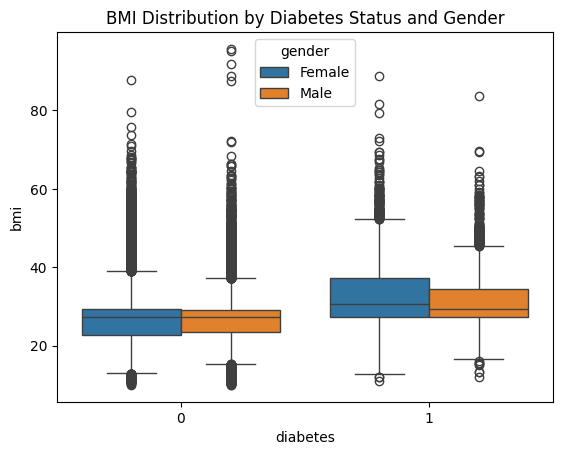

In [22]:
#relation between diabetes, bmi on the basis of gender
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=data)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

In [23]:
#replacing not current to former as both are the same thing
smoking_replace_dict={'not current':'former',
                      'ever':'former',
                      'No Info': 'never'}
data.replace(smoking_replace_dict, inplace=True)
print(data.shape)
data['smoking_history'].value_counts()

(96128, 9)


smoking_history
never      67276
former     19655
current     9197
Name: count, dtype: int64

### Encoding

In [24]:
# performing binary encoding here because i's either male or female here now after dropping 
# 'Other' from the dataset
data['gender_encoded'] = (data['gender'] == 'Male').astype(int)

#droping the original 'gender' column as it's no longer needed
data = data.drop('gender', axis=1)
display(data.sample(5))  

'''Male: 1
   Female: 0'''

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded
63639,24.0,0,0,never,21.21,6.2,159,0,0
82752,60.0,0,0,former,28.27,6.5,85,0,0
20627,3.0,0,0,never,14.70,4.8,159,0,0
24064,49.0,0,0,former,26.69,5.0,90,0,1
42422,35.0,0,0,never,27.32,5.8,145,0,0


'Male: 1\n   Female: 0'

In [25]:
smoking_history_col=list(data['smoking_history'].unique())
smoking_history_col

['never', 'current', 'former']

In [26]:
# Create the one-hot encoded columns
data=pd.get_dummies(data, columns=['smoking_history'], prefix='smoking', dtype=int)

# Display the first few rows with the new columns
display(data.head())

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_current,smoking_former,smoking_never
0,80.0,0,1,25.19,6.6,140,0,0,0,0,1
1,54.0,0,0,27.32,6.6,80,0,0,0,0,1
2,28.0,0,0,27.32,5.7,158,0,1,0,0,1
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,1,1,0,0


checking the info again (need everything in number)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96128 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  96128 non-null  float64
 1   hypertension         96128 non-null  int64  
 2   heart_disease        96128 non-null  int64  
 3   bmi                  96128 non-null  float64
 4   HbA1c_level          96128 non-null  float64
 5   blood_glucose_level  96128 non-null  int64  
 6   diabetes             96128 non-null  int64  
 7   gender_encoded       96128 non-null  int64  
 8   smoking_current      96128 non-null  int64  
 9   smoking_former       96128 non-null  int64  
 10  smoking_never        96128 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 8.8 MB


### Check the corr between features and also make the pairplot

In [28]:
corr=data.corr()
corr

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_current,smoking_former,smoking_never
age,1.000000,0.257297,0.238449,0.344779,0.106708,0.114323,0.264918,-0.028670,0.033393,0.239550,-0.232231
hypertension,0.257297,1.000000,0.119972,0.148124,0.081443,0.084841,0.195696,0.014196,0.015620,0.069261,-0.070973
heart_disease,0.238449,0.119972,1.000000,0.061382,0.068142,0.070838,0.170701,0.078512,0.006018,0.092415,-0.085186
bmi,0.344779,0.148124,0.061382,1.000000,0.084443,0.092593,0.214951,-0.023490,0.053938,0.125701,-0.145231
HbA1c_level,0.106708,0.081443,0.068142,0.084443,1.000000,0.171717,0.406446,0.019928,0.005591,0.037111,-0.036245
blood_glucose_level,0.114323,0.084841,0.070838,0.092593,0.171717,1.000000,0.424366,0.017831,0.011964,0.037310,-0.040510
diabetes,0.264918,0.195696,0.170701,0.214951,0.406446,0.424366,1.000000,0.037837,0.017018,0.092548,-0.092363
gender_encoded,-0.028670,0.014196,0.078512,-0.023490,0.019928,0.017831,0.037837,1.000000,0.025989,0.033550,-0.046203
smoking_current,0.033393,0.015620,0.006018,0.053938,0.005591,0.011964,0.017018,0.025989,1.000000,-0.164899,-0.496681
smoking_former,0.239550,0.069261,0.092415,0.125701,0.037111,0.037310,0.092548,0.033550,-0.164899,1.000000,-0.774149


<Axes: >

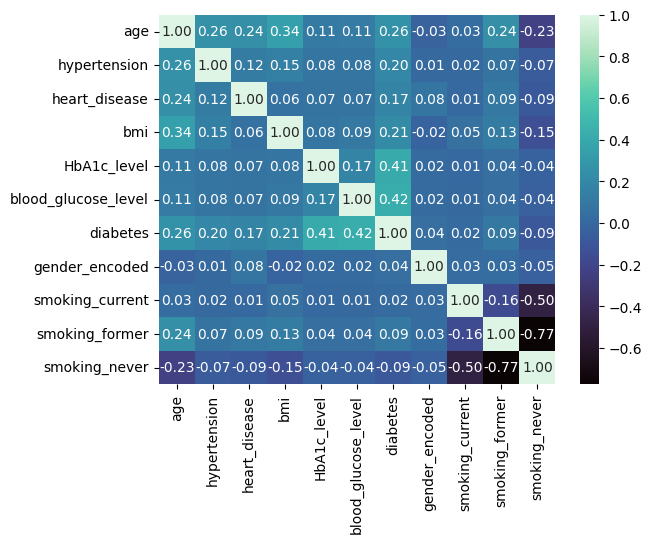

In [31]:
sns.heatmap(corr,fmt='.2f',annot=True, cmap='mako')
#fmt= formating, annot= annotation, cmap= The colormap for mapping data values to colors.

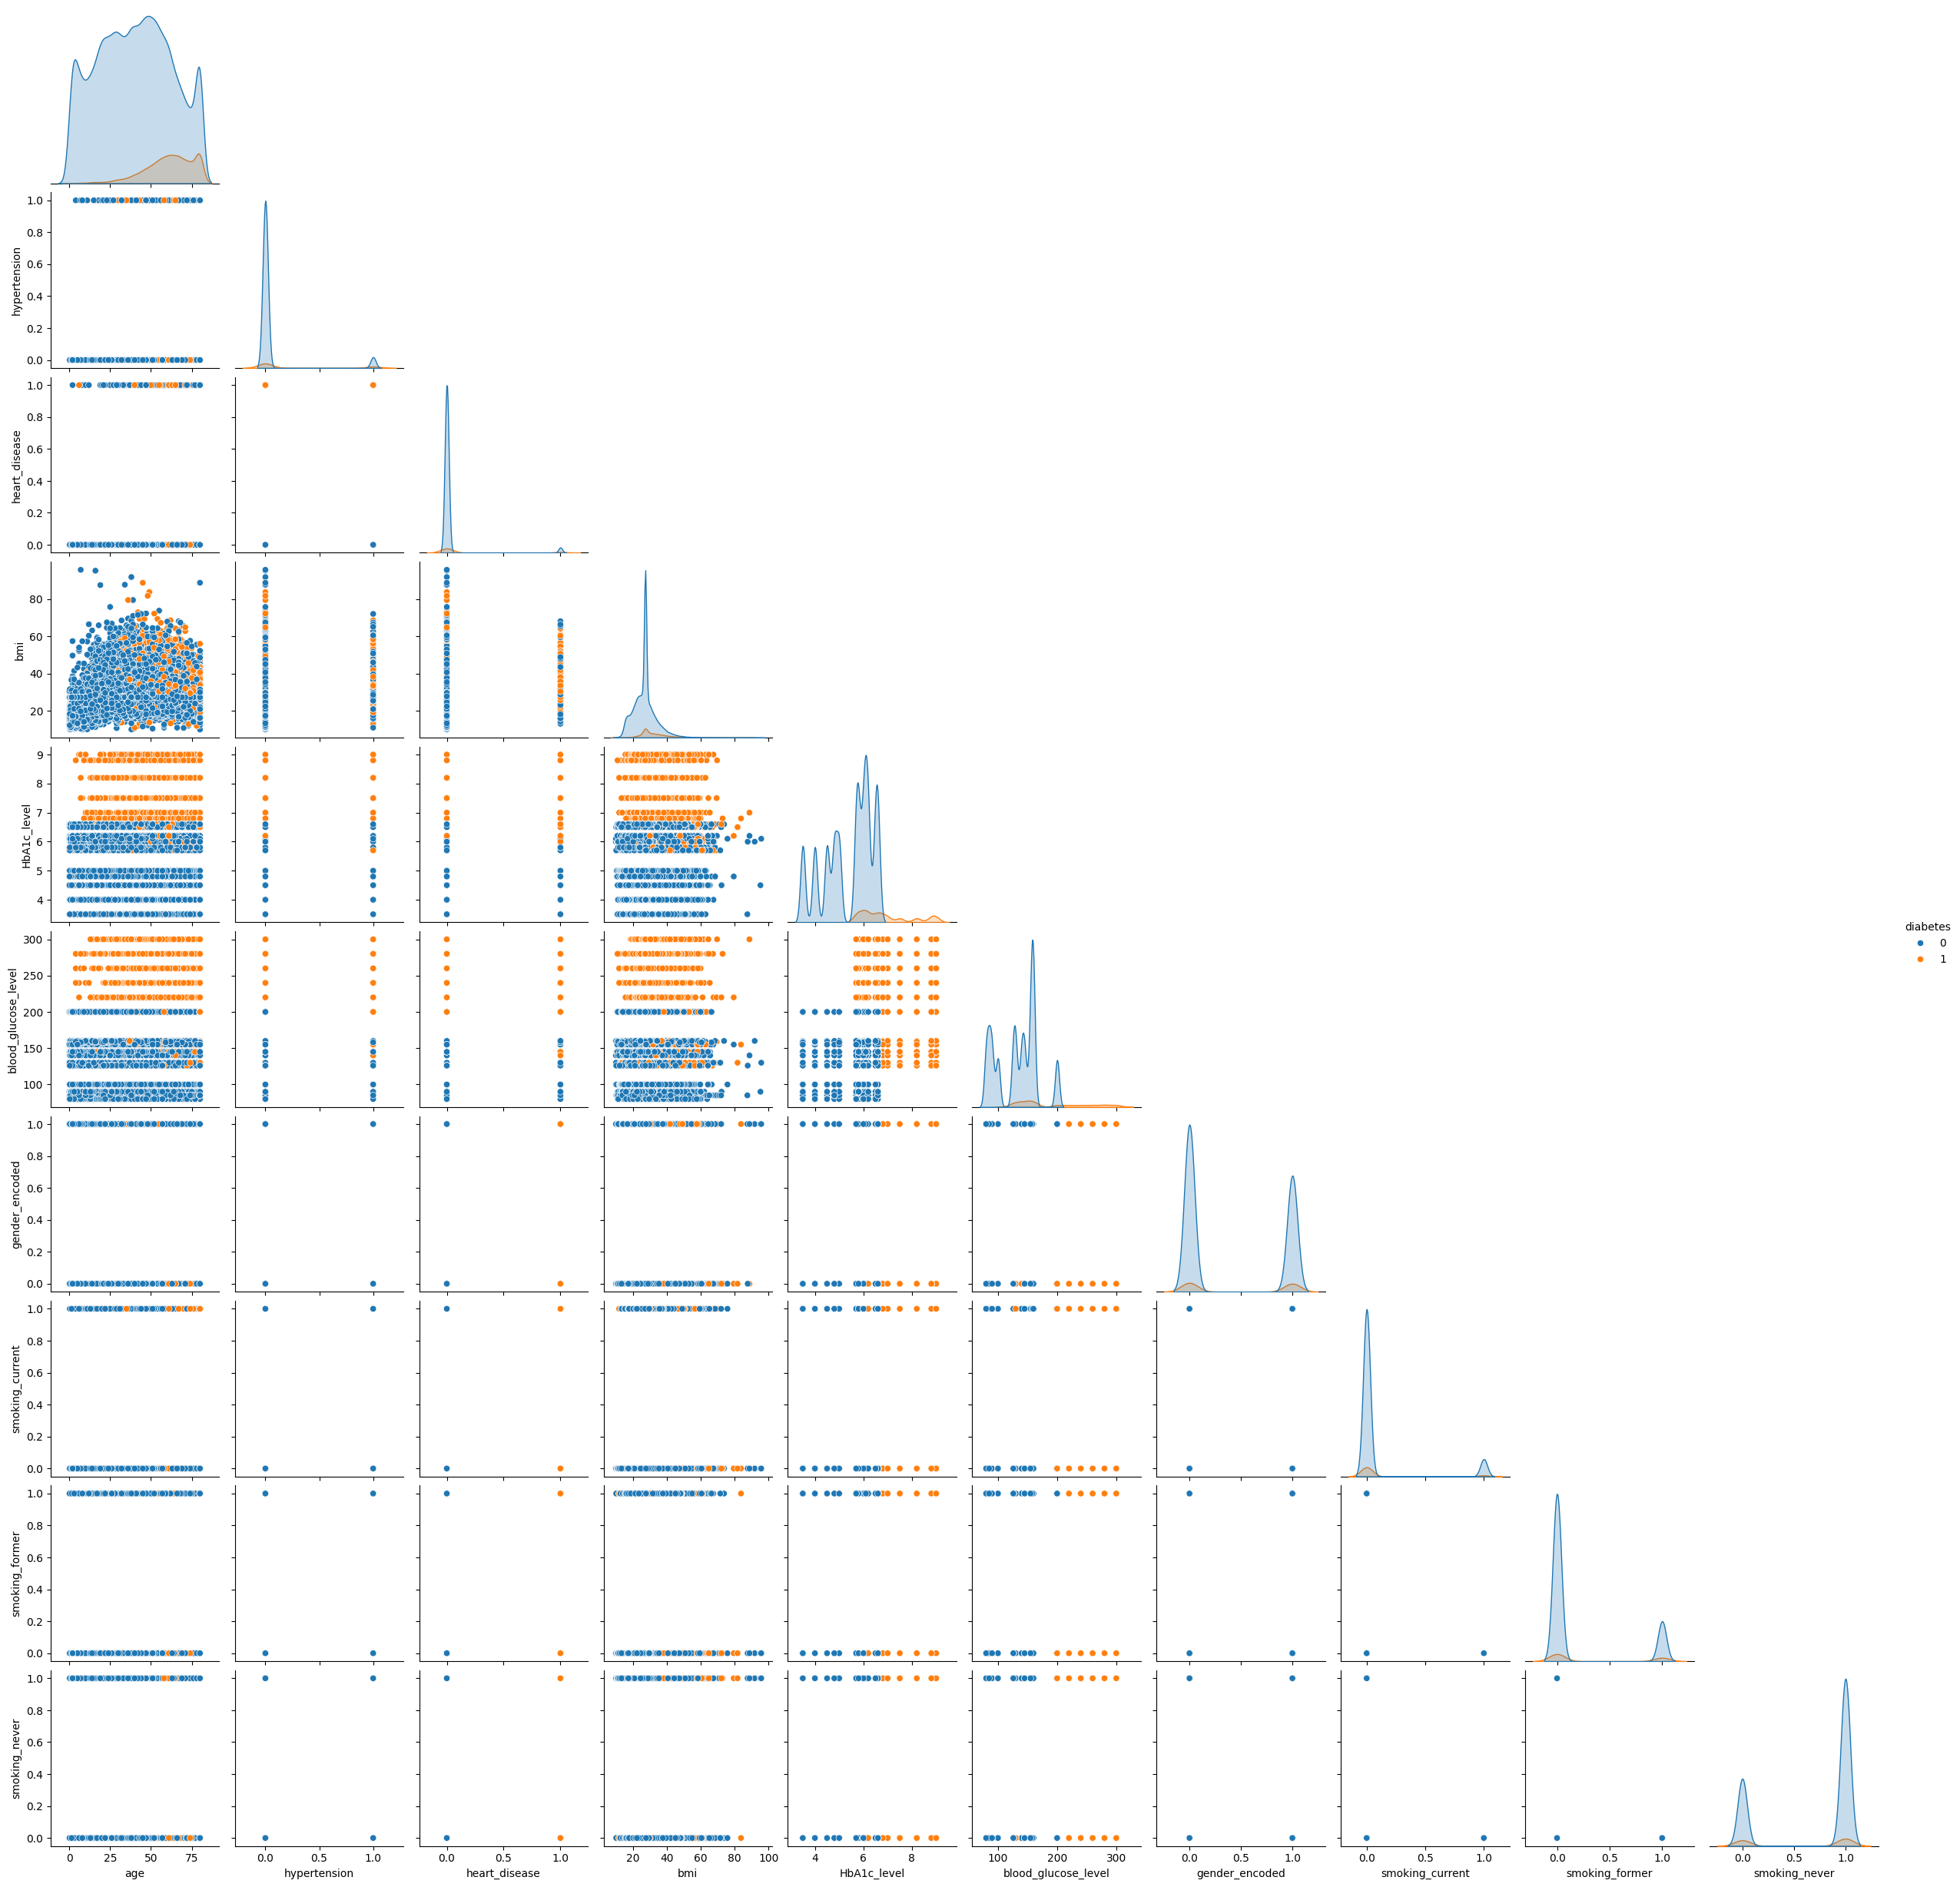

In [35]:
sns.pairplot(data=data,corner=True, hue='diabetes')
plt.show()